In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [13]:
model.fit(x_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 136s 83ms/step - loss: 1.5408 - accuracy: 0.4533
Epoch 2/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4816 - accuracy: 0.4783
Epoch 3/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.4315 - accuracy: 0.4955
Epoch 4/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.3889 - accuracy: 0.5108
Epoch 5/10
1563/1563 [==============================] - 134s 86ms/step - loss: 1.3498 - accuracy: 0.5240
Epoch 6/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.3161 - accuracy: 0.5372
Epoch 7/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.2854 - accuracy: 0.5495
Epoch 8/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.2536 - accuracy: 0.5630
Epoch 9/10
1563/1563 [==============================] - 180s 115ms/step - loss: 1.2229 - accuracy: 0.5717
Epoch 10/10
1563/1563 [==============================]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

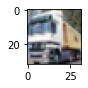

In [21]:
plt.figure(figsize=(10,1))
plt.imshow(x_train[1])

In [24]:
y_predicted=model.predict(x_test_scaled)

In [31]:
np.argmax(y_predicted[1])

8

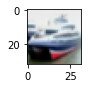

In [30]:
plt.figure(figsize=(10,1))
plt.imshow(x_test[1])

In [32]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','hourse','ship','truck']

In [40]:
def user_predict(x):
    k=classes[np.argmax(y_predicted[x])]
    print(k)

In [43]:
user_predict(1)

ship


In [49]:
def real_value(x):
    k=classes[int(y_test[x])]
    print(k)

In [50]:
real_value(1)

ship


In [51]:
## For confusion matrix

In [53]:
y_test_modified=[int(x) for x in y_test]

In [54]:
y_test_modified[0]

3

In [58]:
y_predicted_modified=[np.argmax(x) for x in y_predicted]

In [59]:
cm=tf.math.confusion_matrix(labels=y_test_modified,predictions=y_predicted_modified)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[520,  17,  32,  12,  64,   1,  12,  56, 256,  30],
       [ 47, 508,   6,  13,   7,   0,  17,  31, 190, 181],
       [ 66,  13, 234,  73, 330,  18,  68, 113,  70,  15],
       [ 27,  12,  52, 323, 148,  51, 111, 125,  85,  66],
       [ 38,   7,  37,  33, 618,   6,  65, 125,  59,  12],
       [ 23,   7,  50, 226, 162, 189,  75, 165,  68,  35],
       [ 12,   9,  26,  60, 247,  11, 516,  53,  36,  30],
       [ 34,   7,  15,  42, 107,  17,  12, 686,  36,  44],
       [ 61,  26,   5,  16,  22,   0,   5,  20, 802,  43],
       [ 54,  91,   4,  19,  22,   5,   9,  72, 125, 599]])>

Text(69.0, 0.5, 'Truth')

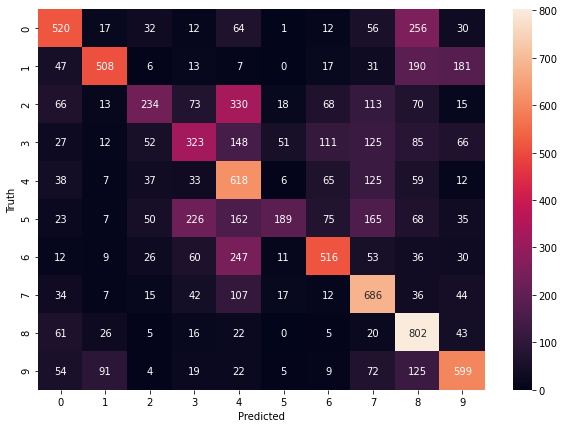

In [60]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [62]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 34s 35ms/step - loss: 1.4001 - accuracy: 0.4995


[1.4001028537750244, 0.49950000643730164]